<a href="https://colab.research.google.com/github/keinerfan/IAP123/blob/Codes/iap123_number_of_pca_morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/IAP123/datasets/IAP123_06_morgan_fp.csv')
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

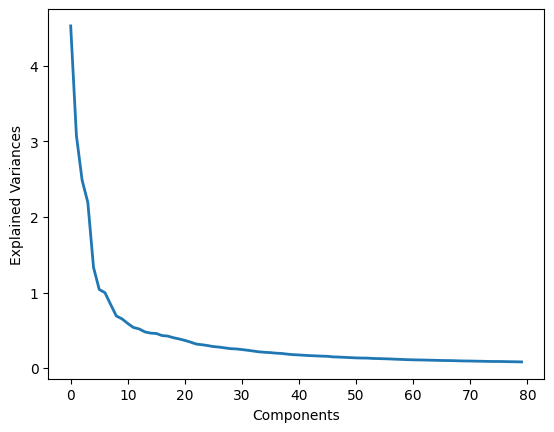

In [3]:

pca2 = PCA(n_components=80).fit(data)
plot(pca2.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [4]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

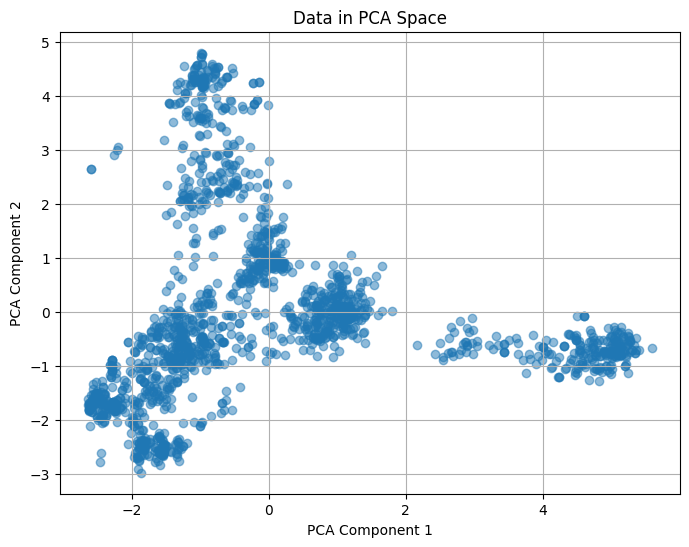

In [5]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming merged_data is your DataFrame with features and target variable
# Example:
# merged_data = pd.read_csv('path_to_your_data.csv')
# Assuming 'target' is the name of your target variable column

# Step 1: Standardize the features (excluding the target variable)
features = merged_data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can determine the optimal number of clusters using the elbow method as shown previously
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Train-test split
X = merged_data.drop(columns=['target'])
y = merged_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a regression model with cluster labels
regressor_with_clusters = LinearRegression()
regressor_with_clusters.fit(X_train, y_train)
y_pred_with_clusters = regressor_with_clusters.predict(X_test)

# Evaluate the model with clusters
mse_with_clusters = mean_squared_error(y_test, y_pred_with_clusters)
print(f'Mean Squared Error with cluster labels: {mse_with_clusters}')

# Step 5: Train a regression model without cluster labels for comparison
X_train_no_clusters = X_train.drop(columns=['Cluster'])
X_test_no_clusters = X_test.drop(columns=['Cluster'])
regressor_without_clusters = LinearRegression()
regressor_without_clusters.fit(X_train_no_clusters, y_train)
y_pred_without_clusters = regressor_without_clusters.predict(X_test_no_clusters)

# Evaluate the model without clusters
mse_without_clusters = mean_squared_error(y_test, y_pred_without_clusters)
print(f'Mean Squared Error without cluster labels: {mse_without_clusters}')

# Optional: Compare performance
improvement = mse_without_clusters - mse_with_clusters
print(f'Improvement in Mean Squared Error: {improvement}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices